In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

In [2]:
path = '/workspace/models/2024_08_05_18_31_53_S_5__times_A_5__Z_2__'

In [3]:
llc = [
    torch.load(f'{path}/llc/{epoch:06d}.pt')
    for epoch in tqdm(range(0, 1800, 3))
]
llc = torch.stack(llc, dim=0).T.to('cpu')

  0%|          | 0/600 [00:00<?, ?it/s]

In [4]:
loss = [
    torch.load(f'{path}/losses/{epoch:06d}.pt')
    for epoch in tqdm(range(0, 3000, 3))
]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [5]:
G0_acc = torch.stack([l['G0_acc'] for l in loss]).T.to('cpu')
G1_acc = torch.stack([l['G1_acc'] for l in loss]).T.to('cpu')

In [6]:
G0_loss = torch.stack([l['G0_loss'] for l in loss]).T.to('cpu')
G1_loss = torch.stack([l['G1_loss'] for l in loss]).T.to('cpu')

In [7]:
plt.rc('font', size=48)

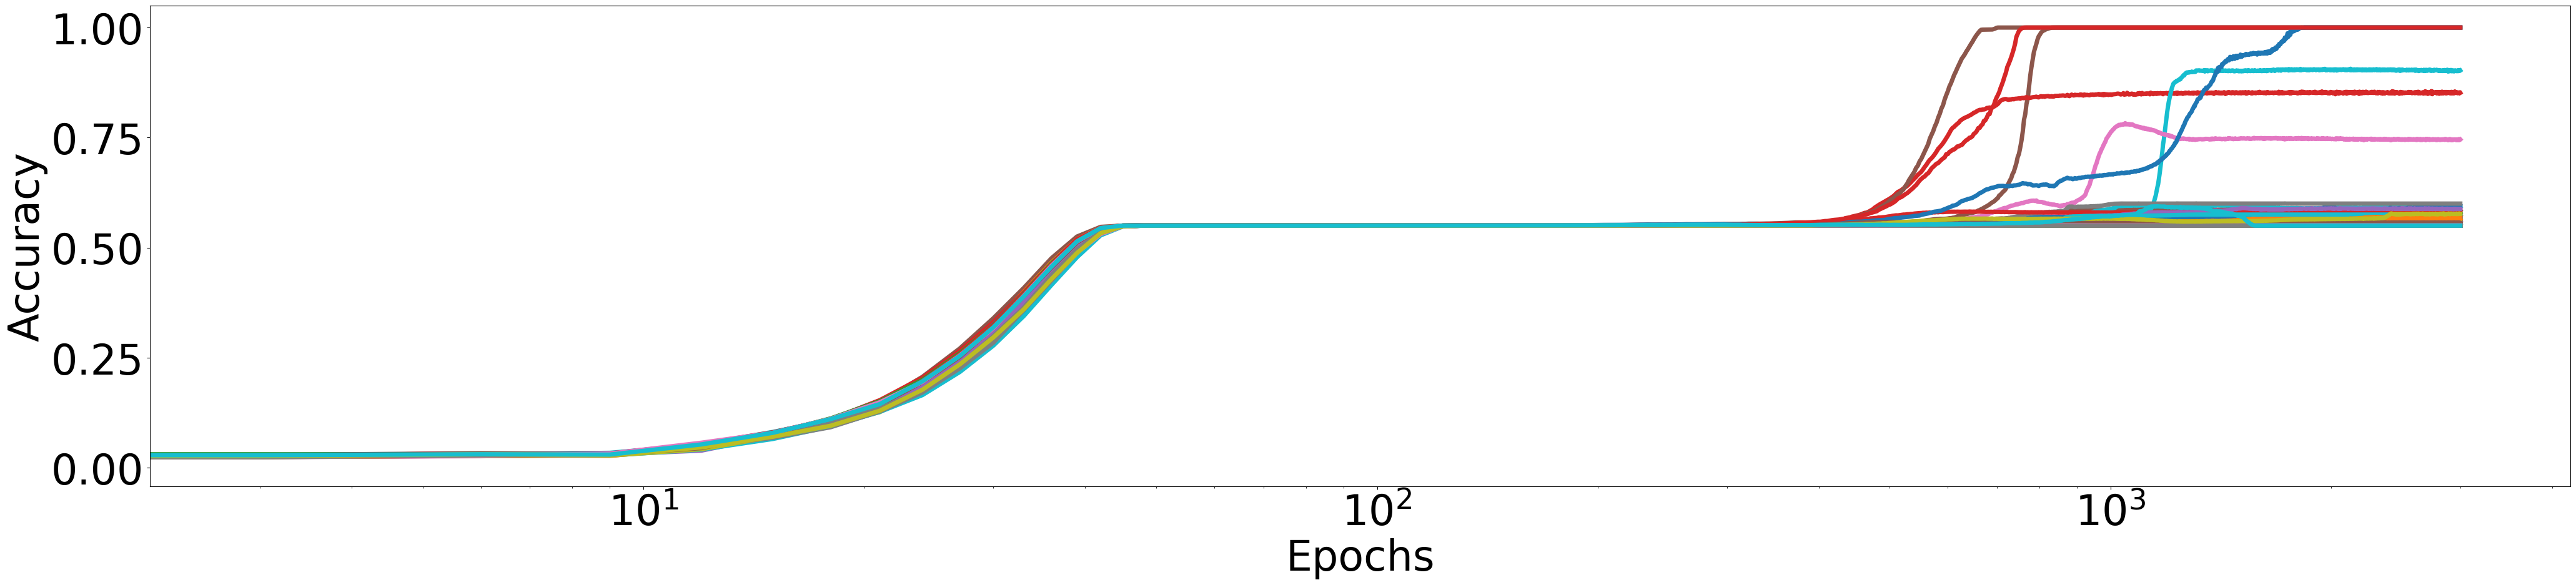

In [93]:
plt.figure(figsize=(50,10))
for i in range(100):
    plt.plot(list(range(0, 3000, 3)), G0_acc[i].tolist(), linewidth=5)

plt.xscale('log')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.title('$G_0=S_5$')
#plt.savefig('plots/S5_acc_log.png', bbox_inches='tight')
plt.show()

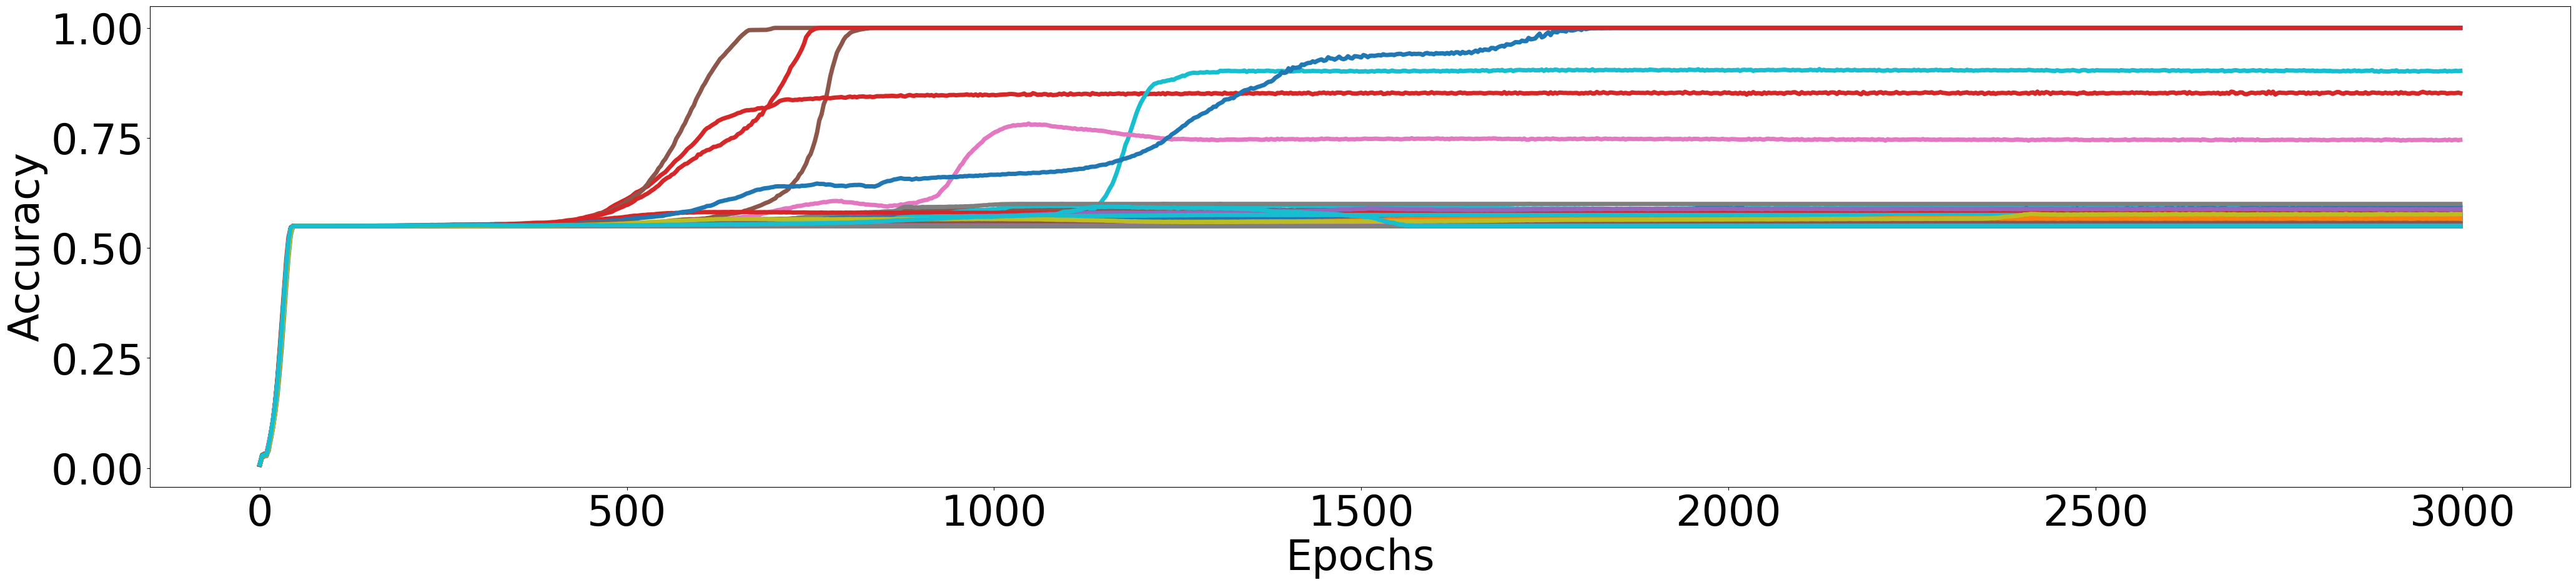

In [94]:
plt.figure(figsize=(50,10))
for i in range(100):
    plt.plot(list(range(0, 3000, 3)), G0_acc[i].tolist(), linewidth=5)

#plt.xscale('log')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.title('$G_0=S_5$')
#plt.savefig('plots/S5_acc_log.png', bbox_inches='tight')
plt.show()

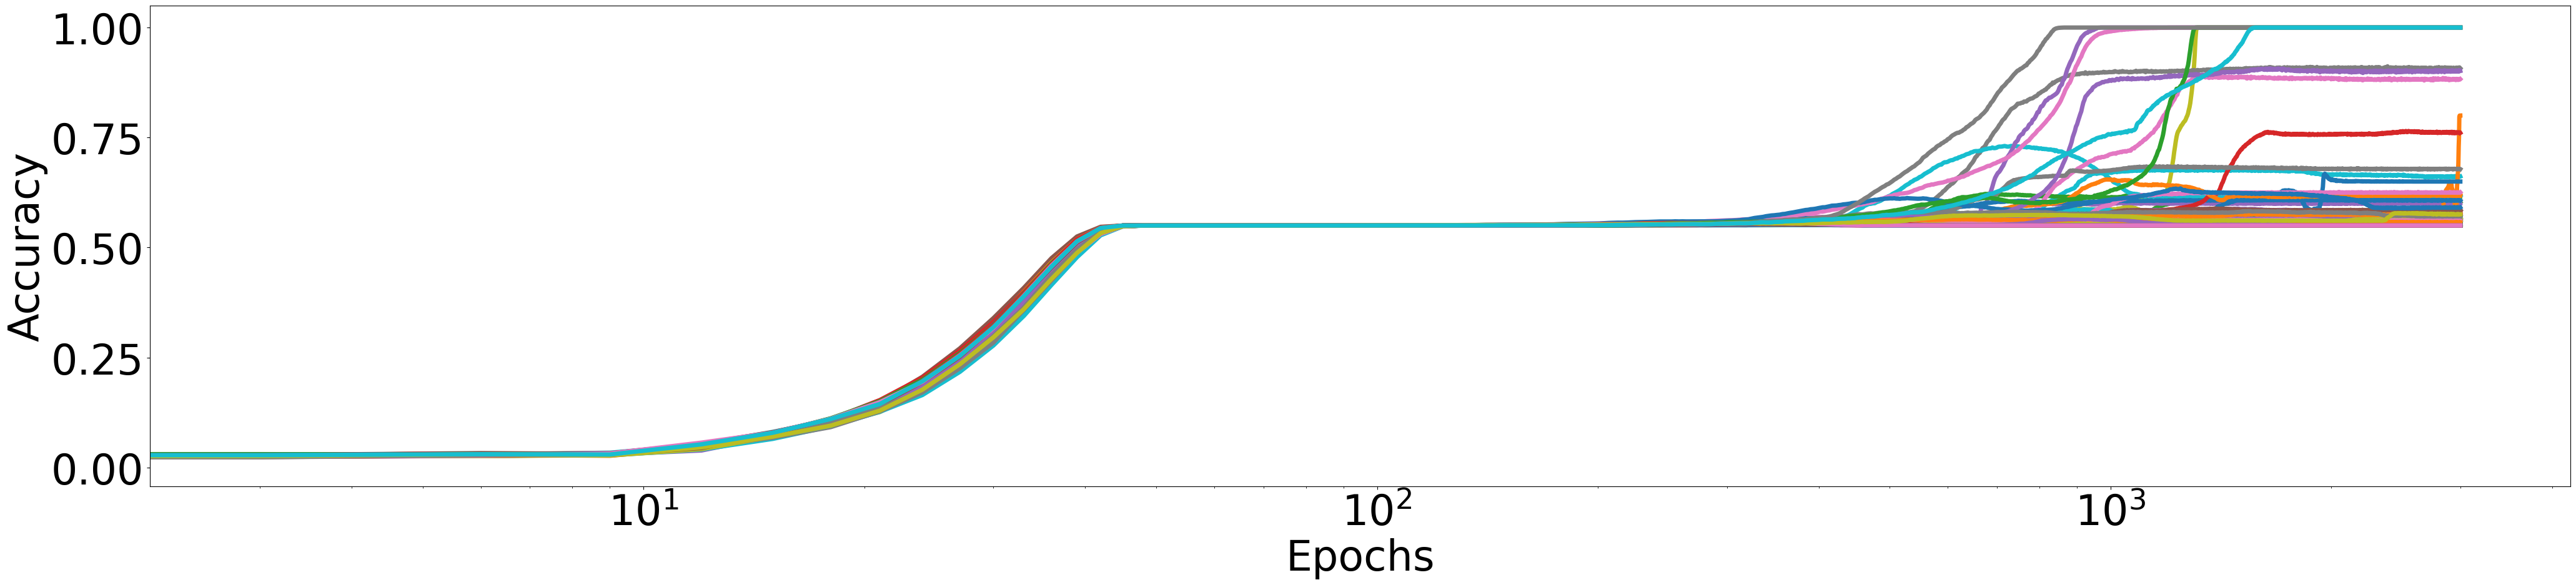

In [83]:
plt.figure(figsize=(50,10))
for i in range(100):
    plt.plot(list(range(0, 3000, 3)), G1_acc[i].tolist(), linewidth=5)

plt.xscale('log')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.title('$G_2=A_5 \\times \mathbb{Z}/2\mathbb{Z}$ accuracy')
plt.savefig('plots/A5x2_acc_log.png', bbox_inches='tight')
plt.show()

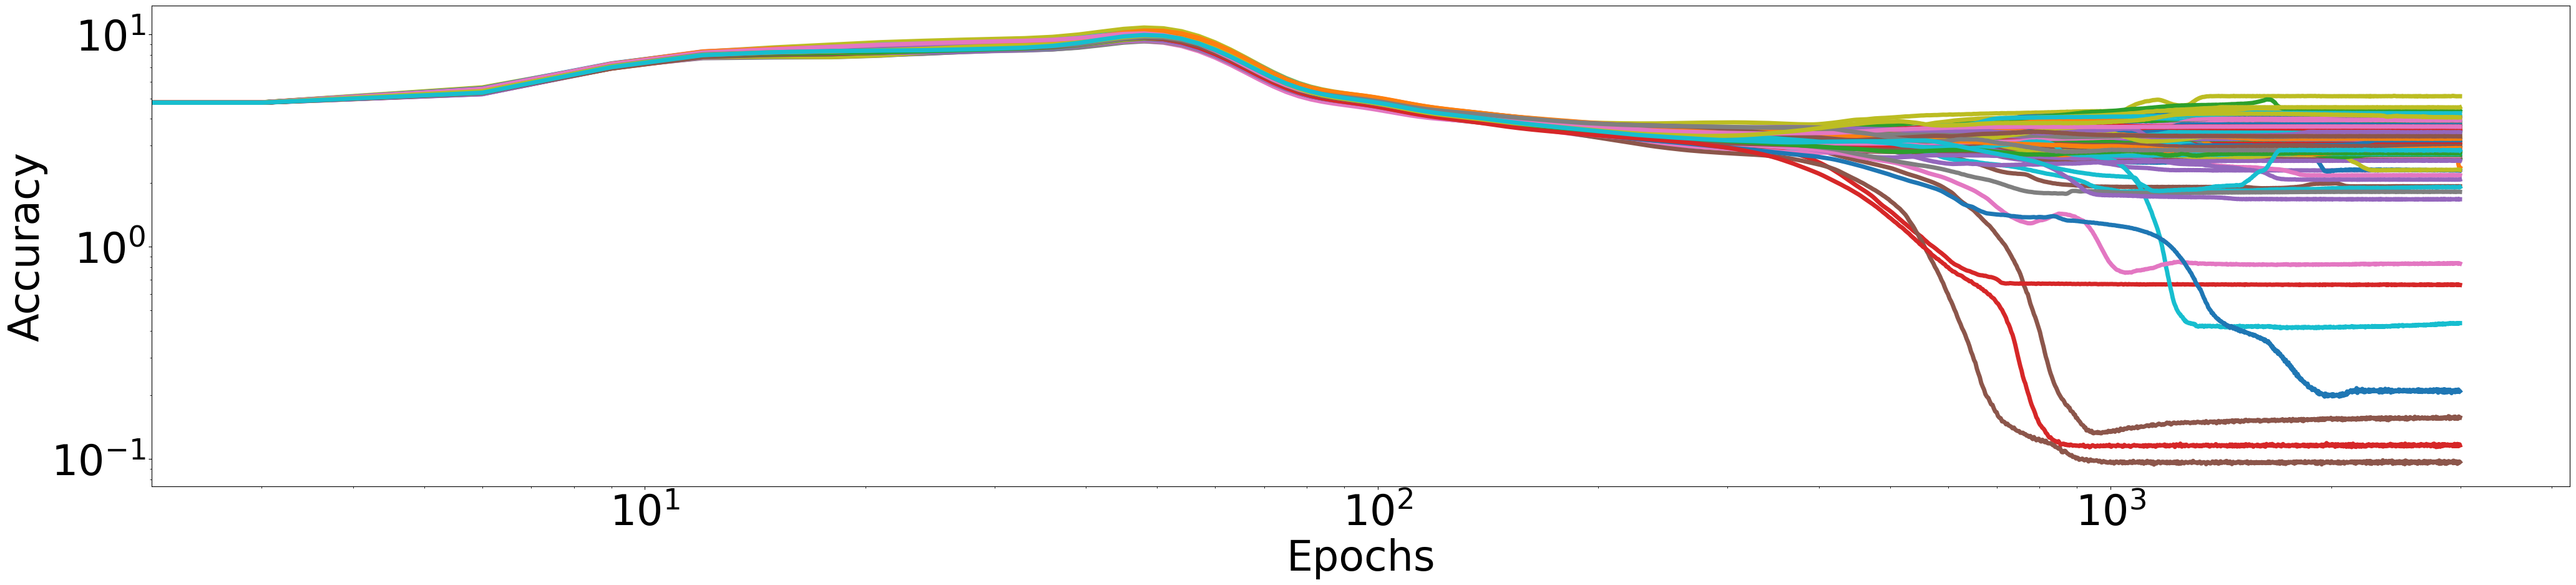

In [88]:
plt.figure(figsize=(50,10))
for i in range(100):
    plt.plot(list(range(0, 3000, 3)), G0_loss[i].tolist(), linewidth=5)

plt.loglog()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.title('$G_0=S_5$')
#plt.savefig('plots/S5_acc_log.png', bbox_inches='tight')
plt.show()

In [94]:
import plotly.graph_objects as go

fig = go.Figure()
for i in range(100):
    if G0_acc[i][-1] > 0.7:
        c = 'red'
        a = 0.4
    elif G1_acc[i][-1] > 0.7:
        c = 'blue'
        a = 0.4
    else:
        c = 'rgb(100, 100, 100)'
        a = 0.2
    fig.add_trace(
        go.Scatter3d(
            x=list(range(0, 3000, 3)),
            y=G0_acc[i].tolist(),
            z=G1_acc[i].tolist(),
            mode='lines',
            line=dict(width=5, color=c),
            opacity=a,
        )
    )

train = 7920/14400
x_plane = np.linspace(0, 3000, 10)
z_plane = np.linspace(train, 1, 10)
X_plane, Z_plane = np.meshgrid(x_plane, z_plane)
Y_plane = np.full(X_plane.shape, train)

fig.add_trace(go.Surface(
    x=X_plane,
    y=Y_plane,
    z=Z_plane,
    #colorscale='Blues',
    opacity=0.2,
    showscale=False,
    surfacecolor=np.full(X_plane.shape, 1),  # Uniform color
    colorscale=[[0, 'rgb(0,0,200)'], [1, 'rgb(0,0,200)']],
))
fig.add_trace(go.Surface(
    x=X_plane,
    y=Z_plane,
    z=Y_plane,
    #colorscale='Blues',
    surfacecolor=np.full(X_plane.shape, 1),  # Uniform color
    colorscale=[[0, 'rgb(200,0,0)'], [1, 'rgb(200,0,0)']],
    opacity=0.2,
    showscale=False
))
None

In [95]:
x_plane

array([   0.        ,  333.33333333,  666.66666667, 1000.        ,
       1333.33333333, 1666.66666667, 2000.        , 2333.33333333,
       2666.66666667, 3000.        ])

In [ ]:
fig.update_layout(
    width=1600,
    height=1200,
    scene=dict(
        aspectmode='manual',
        aspectratio=dict(x=3,y=1,z=1),
        xaxis=dict(title=dict(text="Epochs"), autorange='reversed'),
        yaxis=dict(title=dict(text="S5 Accuracy")),
        zaxis=dict(title=dict(text="A5xC2 Accuracy")),
    ),
    showlegend=False
)
fig.show()

In [97]:
fig.write_html('/workspace/plots/accuracy_3d_S5_A5x2.html')

In [19]:
!poetry add seaborn

Using version ^0.13.2 for seaborn

Updating dependencies
Resolving dependencies... (14.0s)

Package operations: 1 install, 0 updates, 0 removals

  - Installing seaborn (0.13.2): Pending...
  - Installing seaborn (0.13.2): Downloading... 0%
  - Installing seaborn (0.13.2): Downloading... 100%
  - Installing seaborn (0.13.2): Installing...
  - Installing seaborn (0.13.2)

Writing lock file


In [20]:
import seaborn as sns

In [31]:
points = []
for i in range(100):
    for j in range(1000):
        points.append((j * 3, G0_acc[i][j].item()))

In [32]:
import pandas as pd
df = pd.DataFrame(data=points, columns=['epochs', 'accuracy'])

<Axes: xlabel='epochs', ylabel='accuracy'>

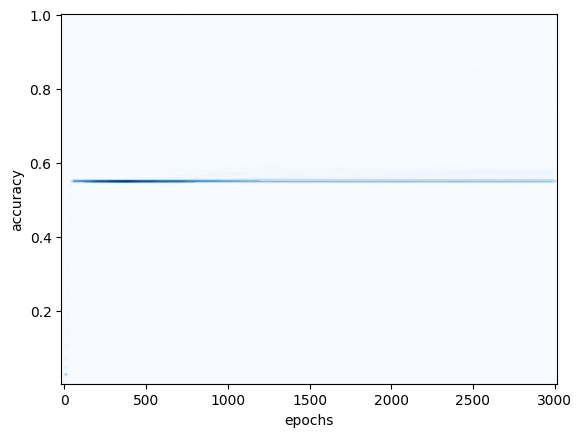

In [38]:
sns.kdeplot(data=df, x='epochs', y='accuracy', fill=True, thresh=0, levels=100, cmap='Blues', bw_adjust=0.05)

In [22]:
geyser = sns.load_dataset('geyser')

In [23]:
geyser

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


In [105]:
rcParams['figure.figsize'] = (30, 30)

NameError: name 'rcParams' is not defined

In [12]:
idx = 55
epochs = 600
x = np.array(list(range(0, epochs*3, 3)))

In [20]:
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt 

spline = make_interp_spline(x[::10], llc[idx].numpy()[::10])
smooth_llc = spline(x)

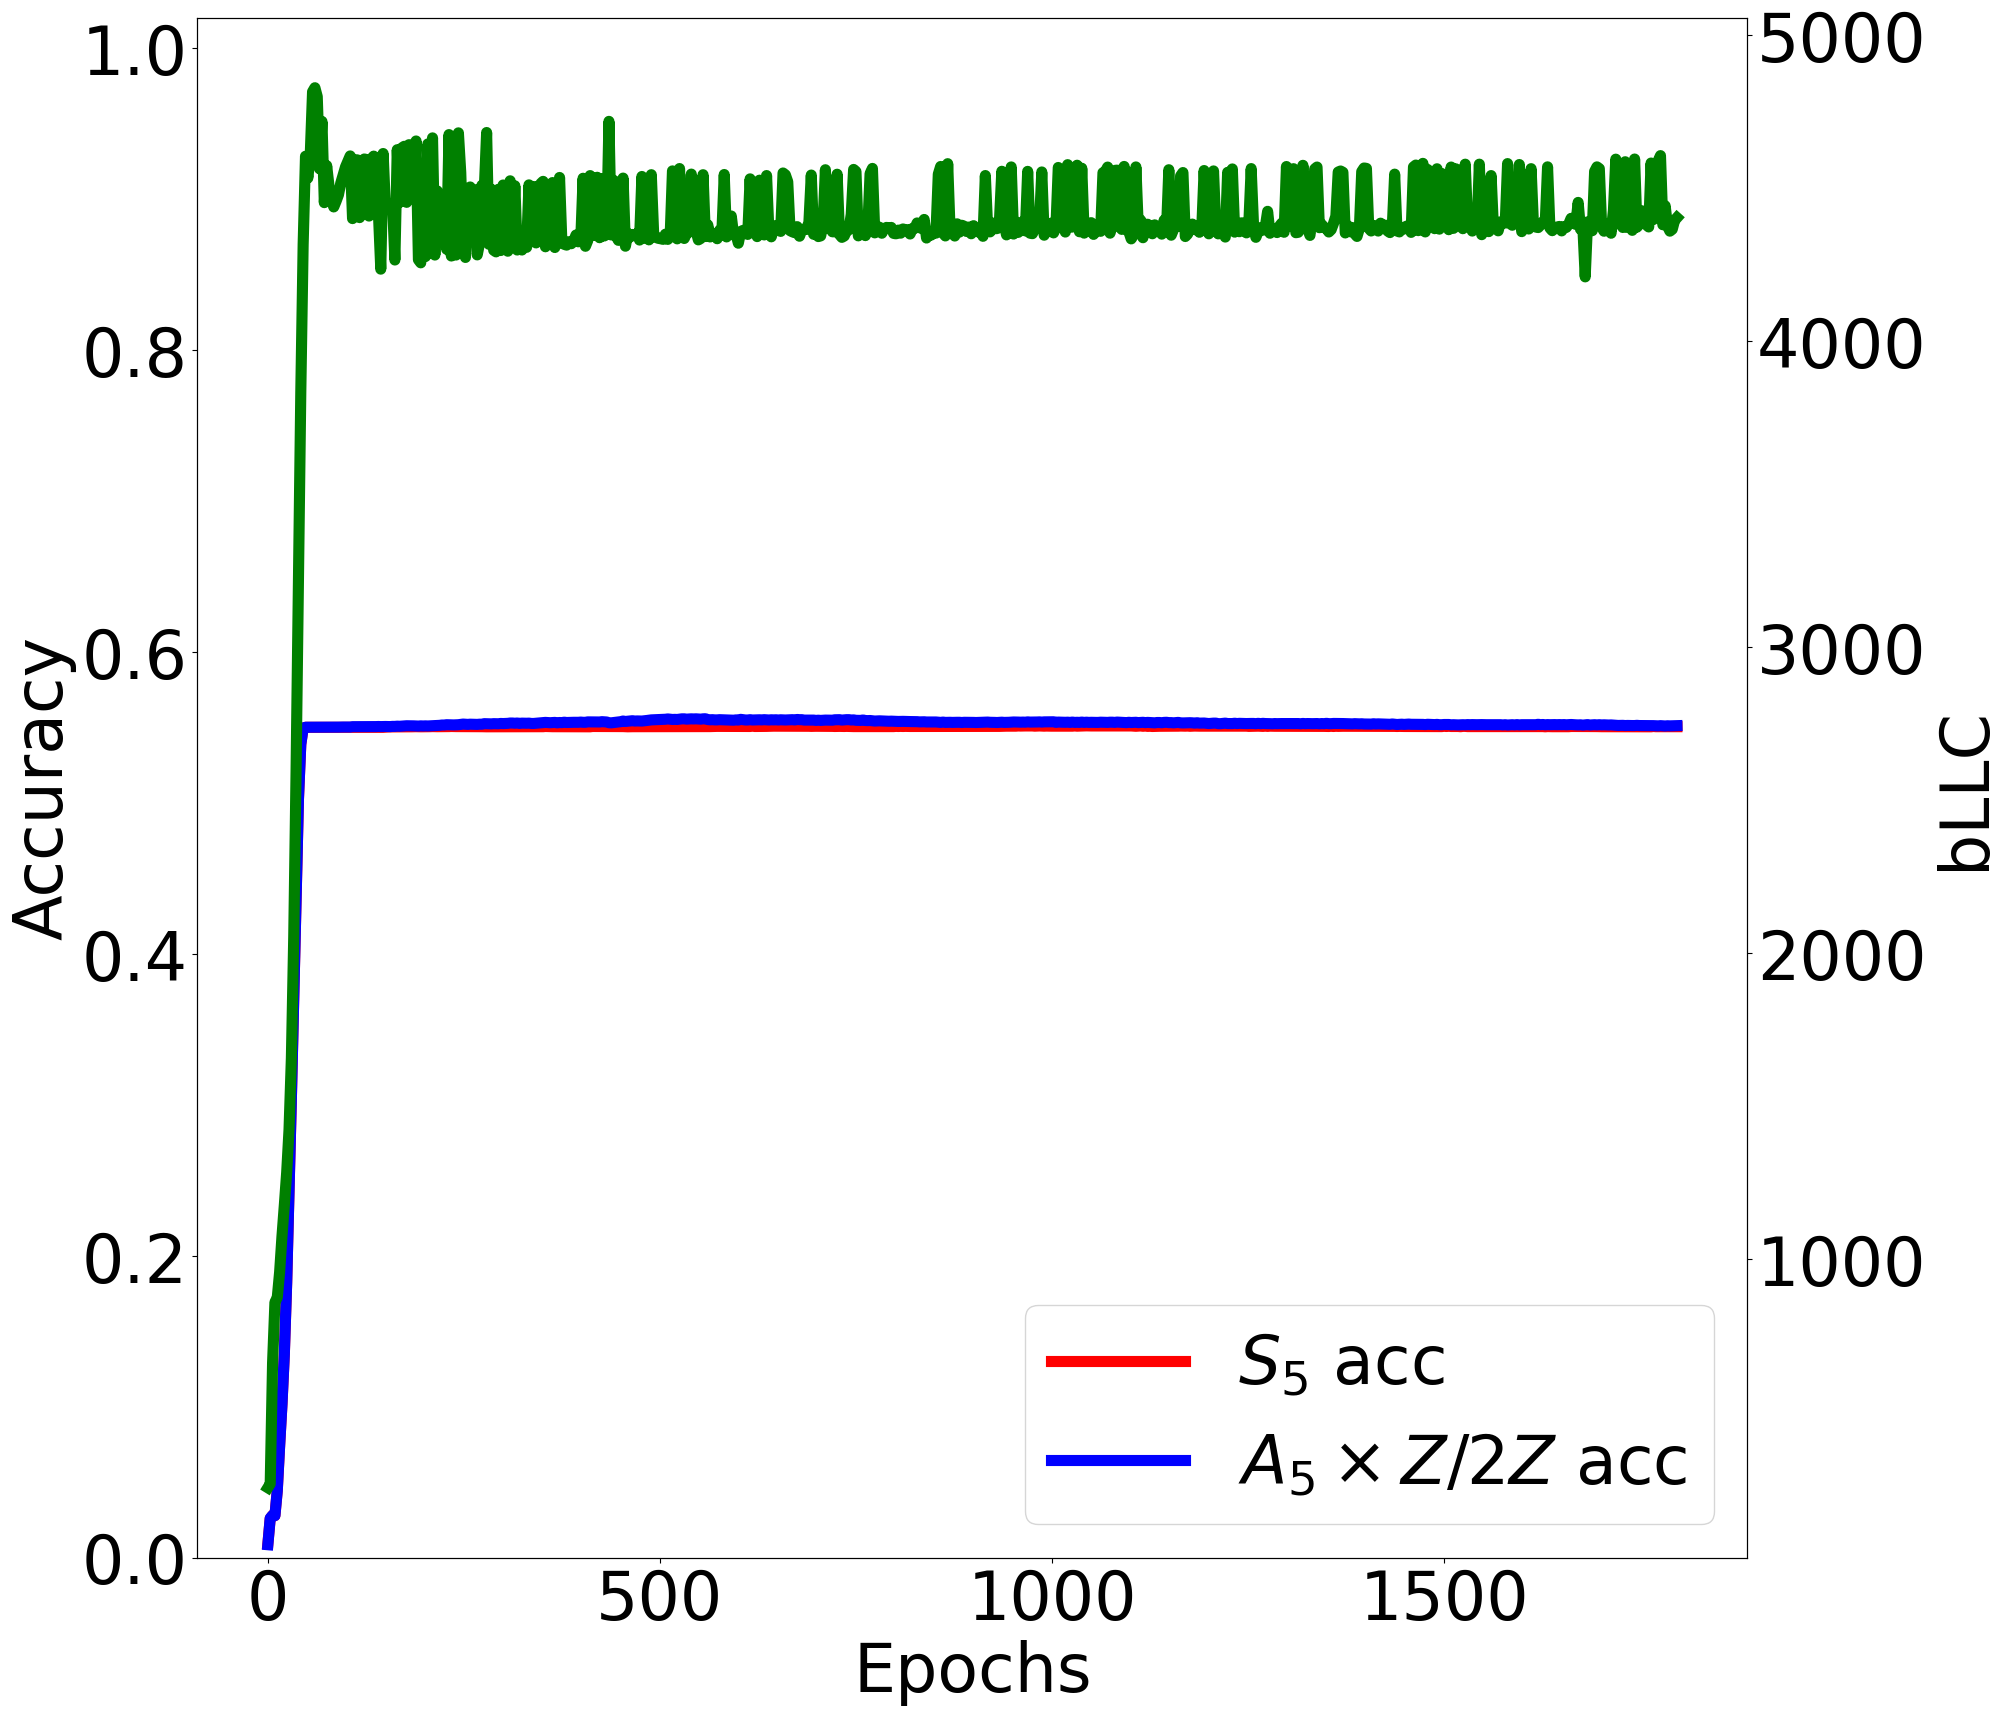

In [43]:
idx = 0
epochs = 600
fig, ax1 = plt.subplots(figsize=(20, 20))
ax1.plot(range(0, epochs*3, 3), G0_acc[idx][:epochs], linewidth=8, c='red', label='$S_5$ acc')
ax1.plot(range(0, epochs*3, 3), G1_acc[idx][:epochs], linewidth=8, c='blue', label='$A_5\\times Z/2Z$ acc')
ax2 = ax1.twinx()
ax2.plot(range(0, epochs*3, 3), llc[idx][:epochs], linewidth=8, c='green')
#ax1.set_xscale('log')
#ax2.set_xscale('log')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_ylim((0, 1.02))
ax2.set_ylabel('bLLC')
ax1.legend(loc='lower right')
plt.savefig('plots/bllc_epoch_none.png', bbox_inches='tight')
plt.show()

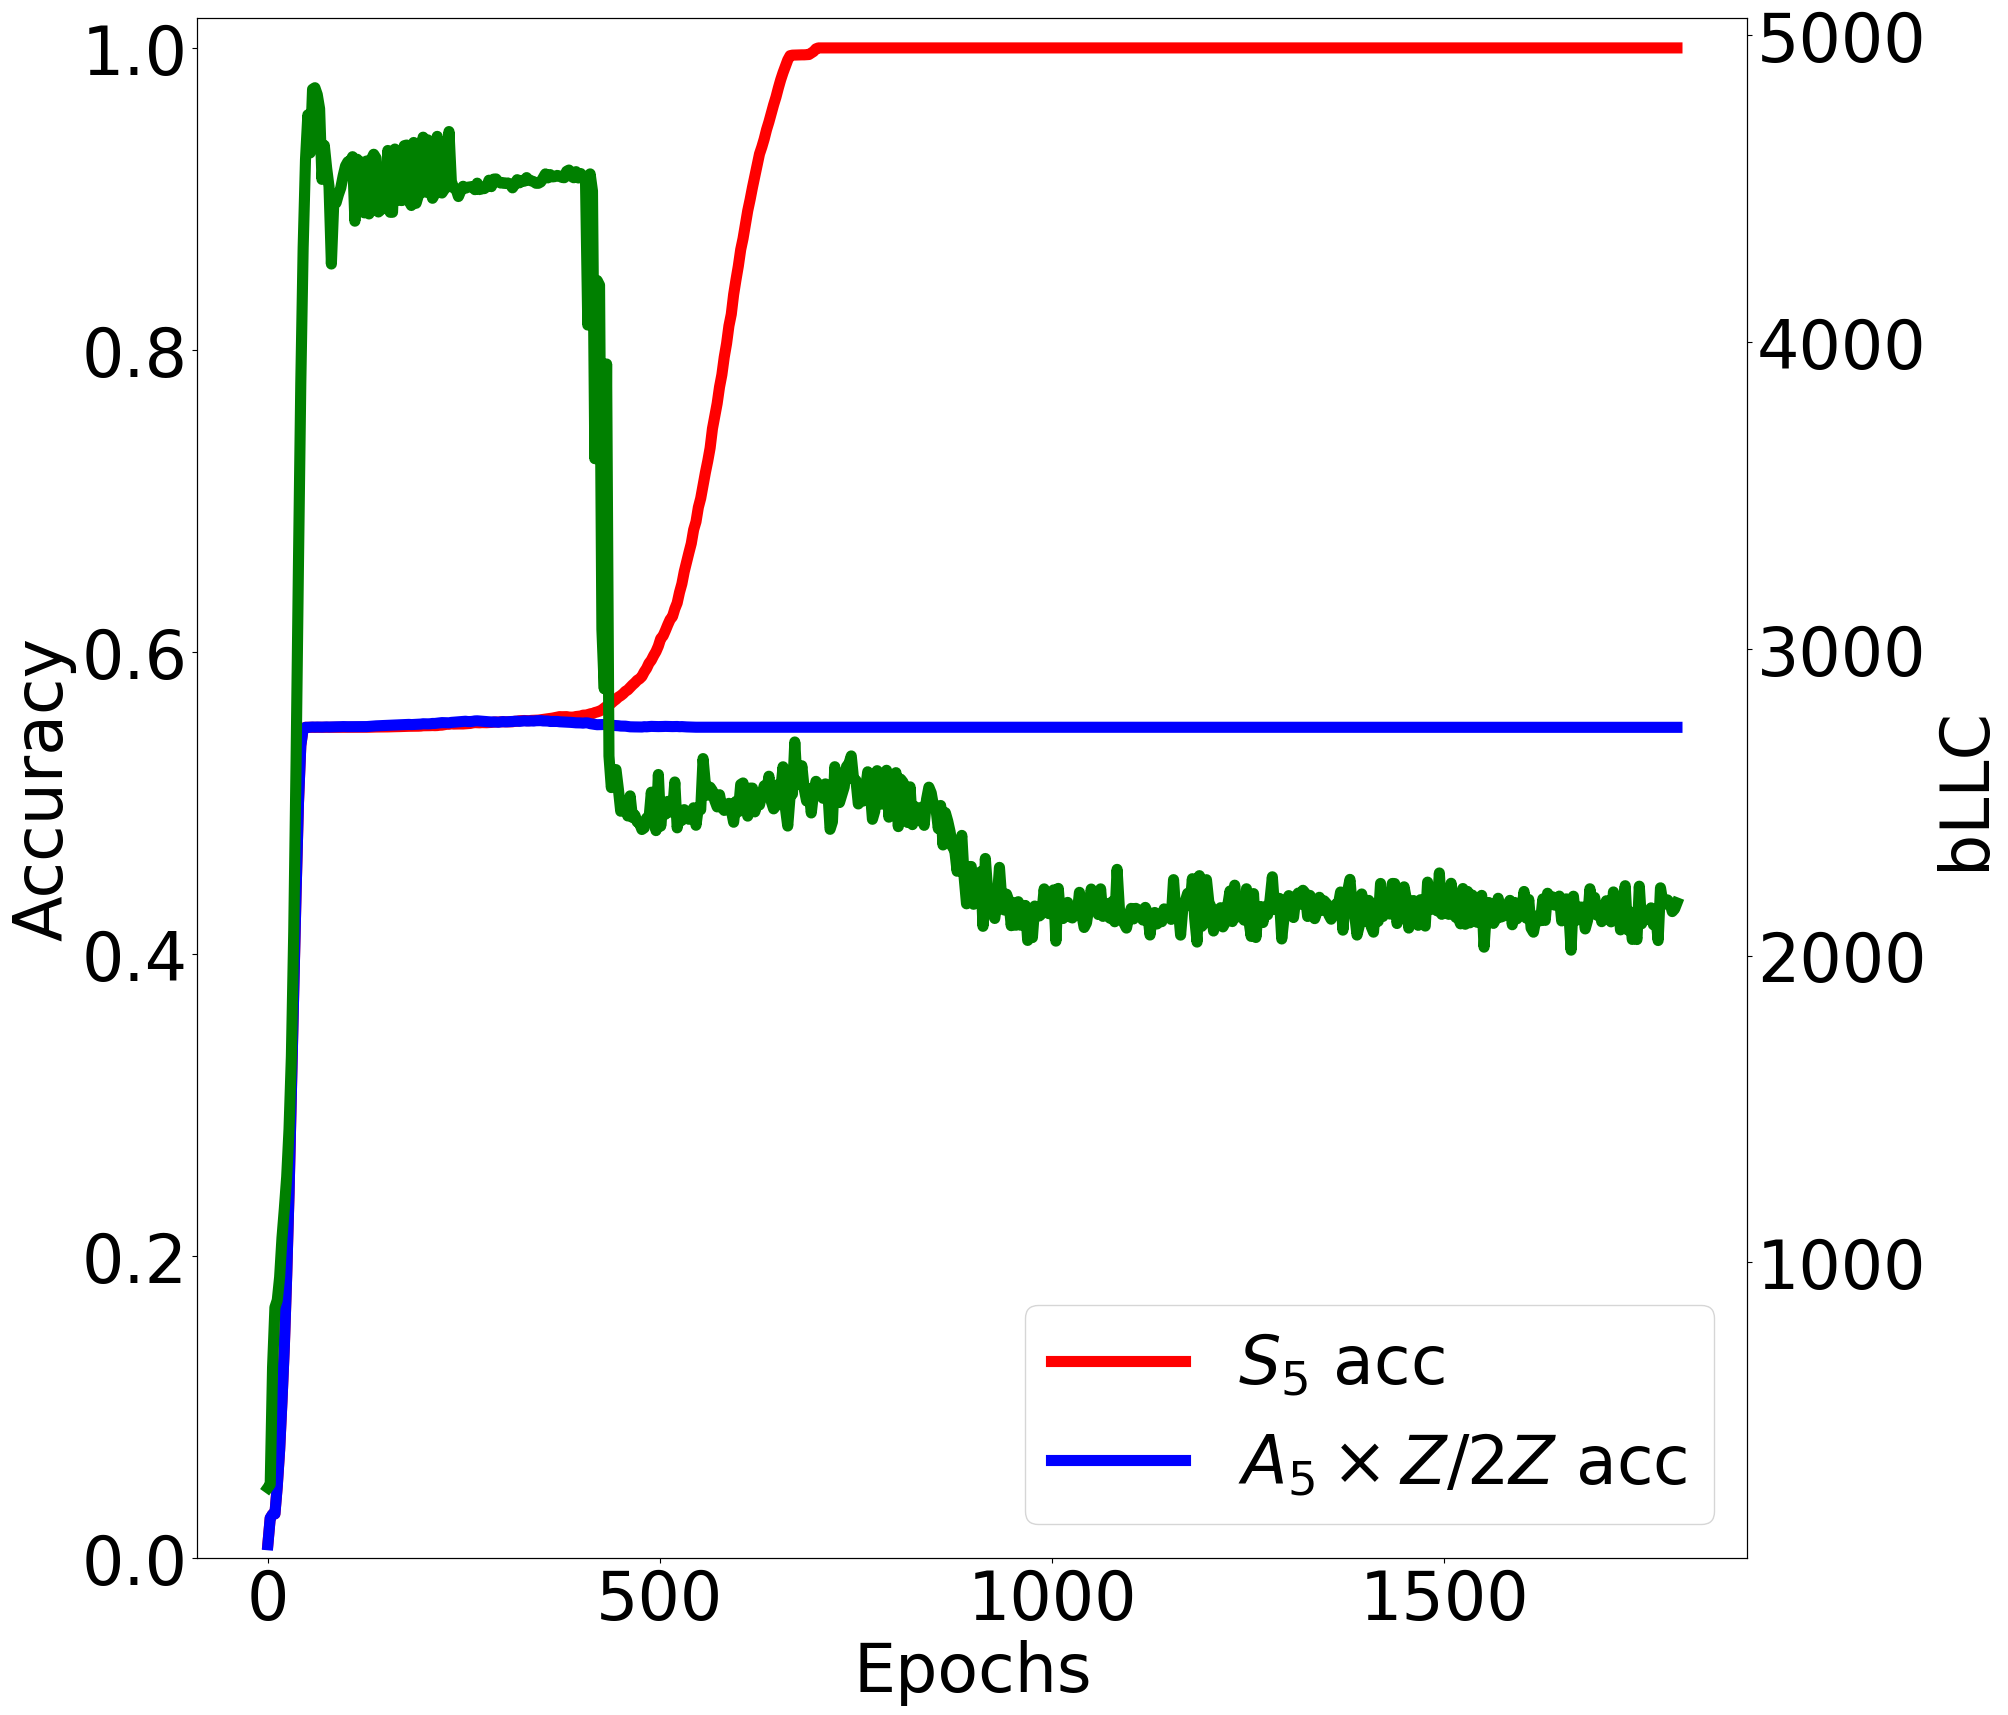

In [44]:
idx = 55
epochs = 600
fig, ax1 = plt.subplots(figsize=(20, 20))
ax1.plot(range(0, epochs*3, 3), G0_acc[idx][:epochs], linewidth=8, c='red', label='$S_5$ acc')
ax1.plot(range(0, epochs*3, 3), G1_acc[idx][:epochs], linewidth=8, c='blue', label='$A_5\\times Z/2Z$ acc')
ax2 = ax1.twinx()
ax2.plot(range(0, epochs*3, 3), llc[idx][:epochs], linewidth=8, c='green')
#ax1.set_xscale('log')
#ax2.set_xscale('log')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_ylim((0, 1.02))
ax2.set_ylabel('bLLC')
ax1.legend(loc='lower right')
plt.savefig('plots/bllc_epoch_G0.png', bbox_inches='tight')
plt.show()

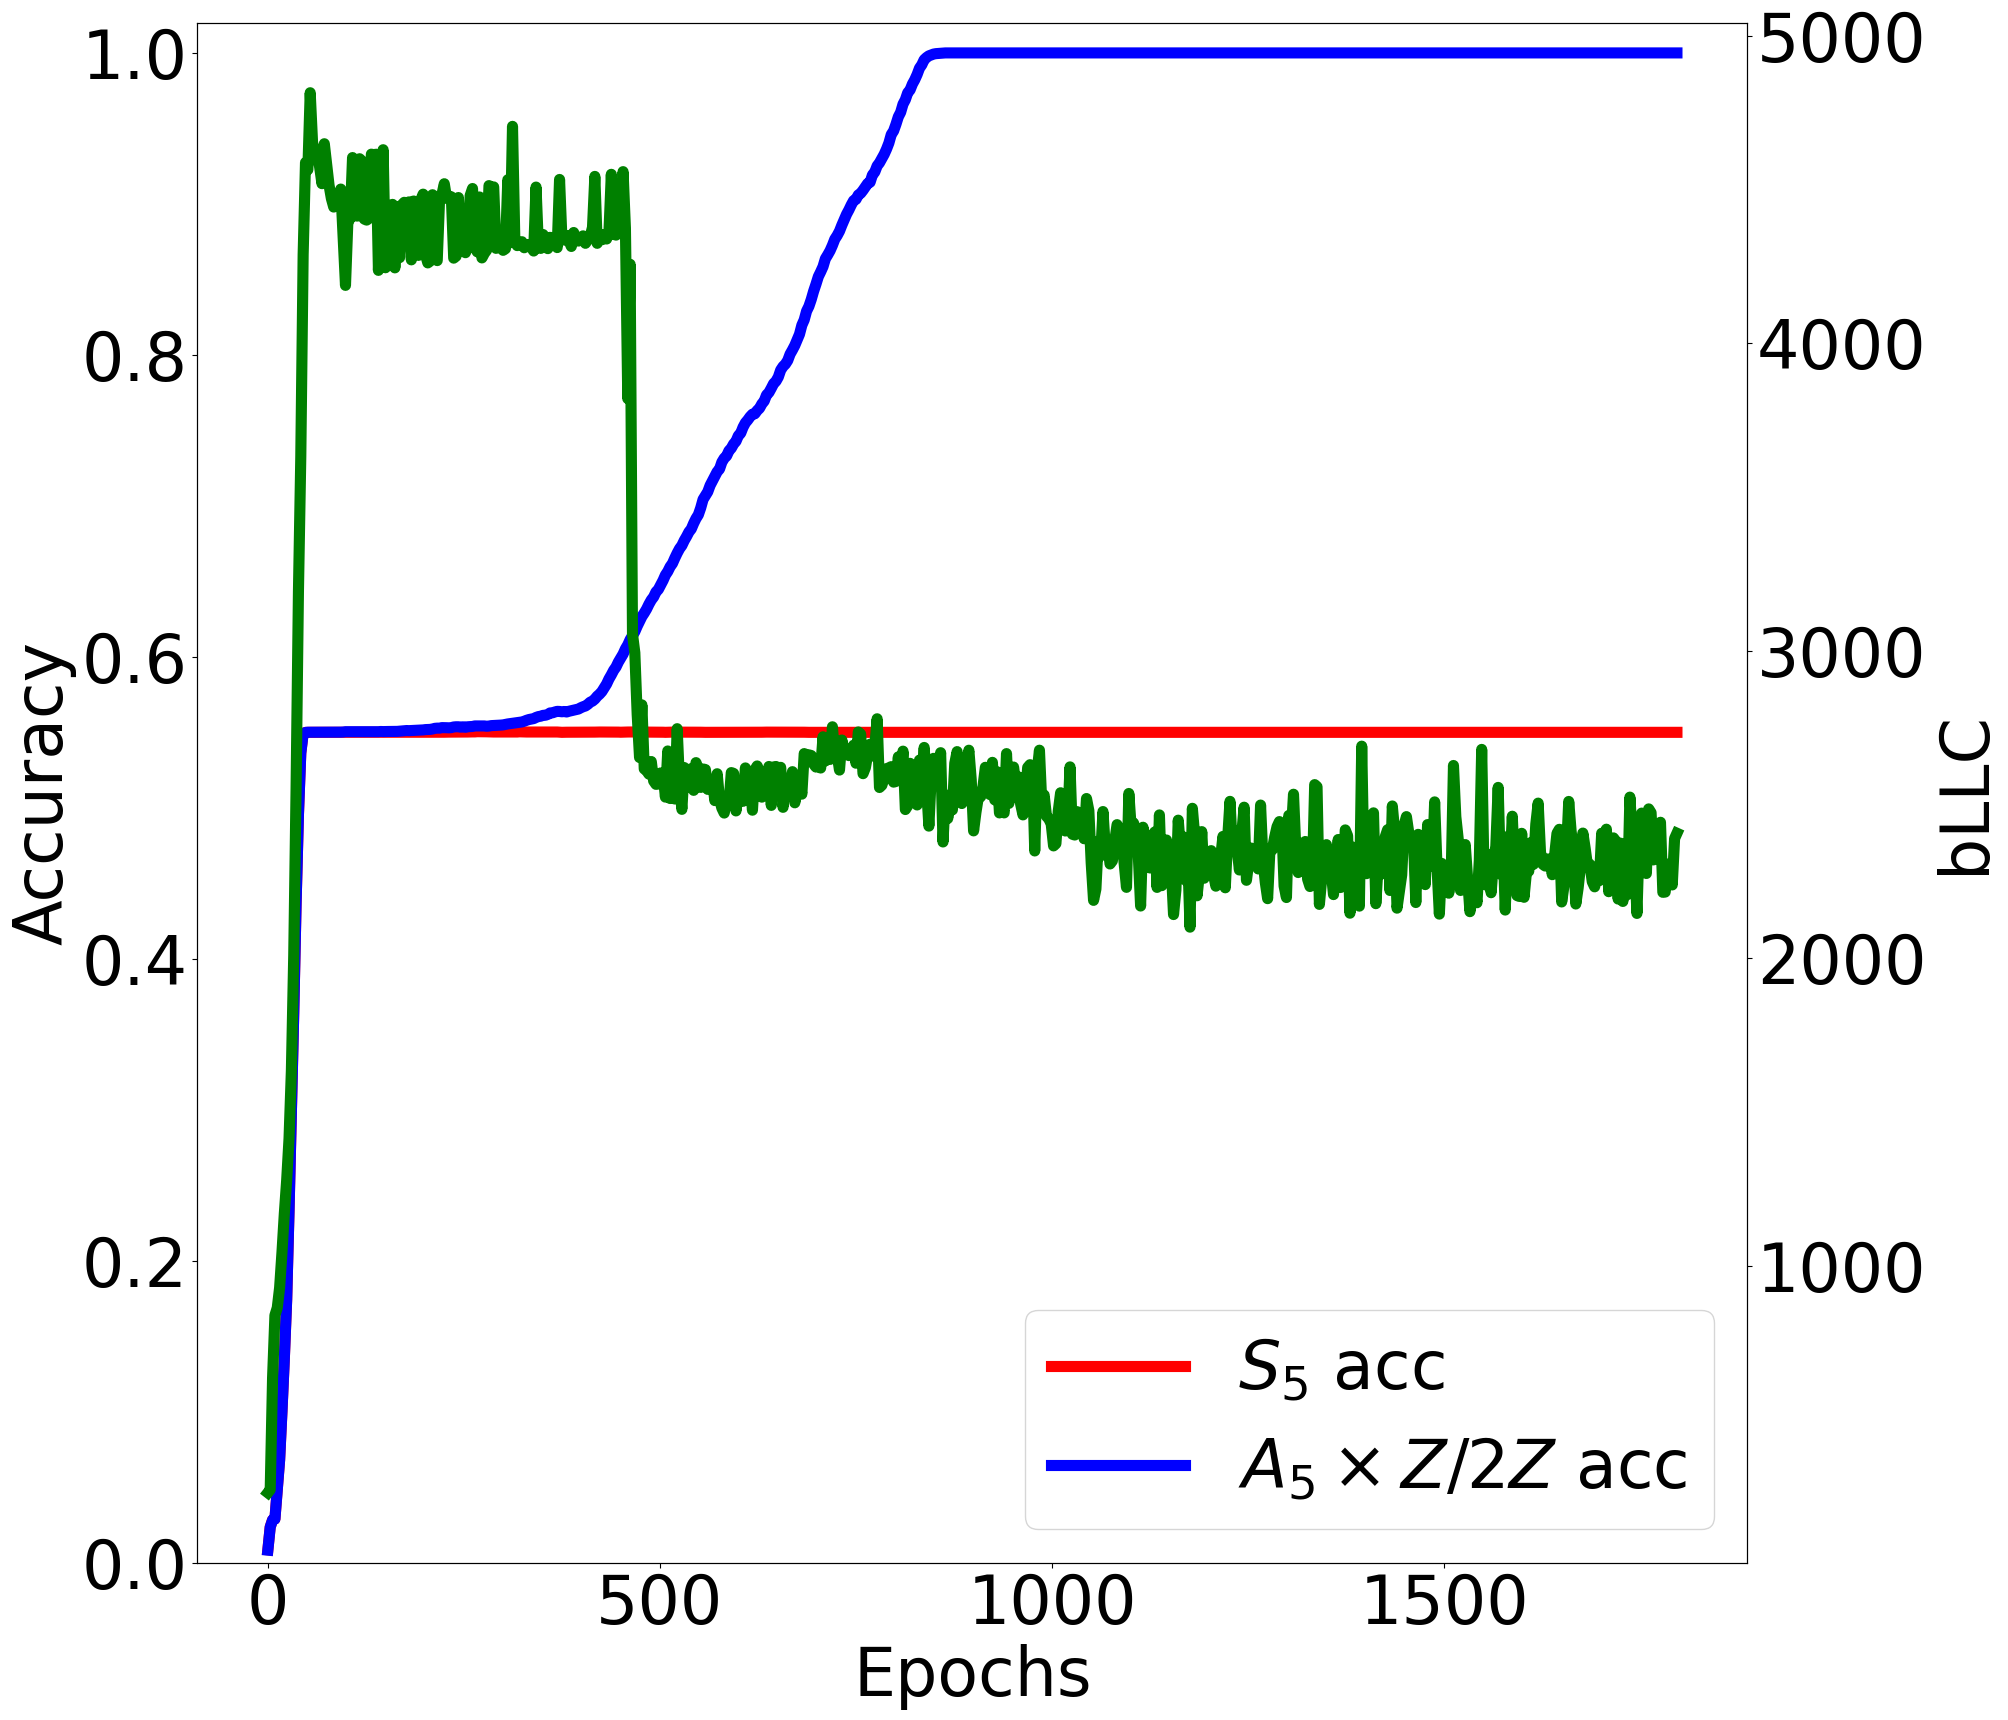

In [45]:
idx = 97
epochs = 600
fig, ax1 = plt.subplots(figsize=(20, 20))
ax1.plot(range(0, epochs*3, 3), G0_acc[idx][:epochs], linewidth=8, c='red', label='$S_5$ acc')
ax1.plot(range(0, epochs*3, 3), G1_acc[idx][:epochs], linewidth=8, c='blue', label='$A_5\\times Z/2Z$ acc')
ax2 = ax1.twinx()
ax2.plot(range(0, epochs*3, 3), llc[idx][:epochs], linewidth=8, c='green')
#ax1.set_xscale('log')
#ax2.set_xscale('log')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_ylim((0, 1.02))
ax2.set_ylabel('bLLC')
ax1.legend(loc='lower right')
plt.savefig('plots/bllc_epoch_G1.png', bbox_inches='tight')
plt.show()